Importing the dependencies.

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection and Processing

In [5]:
# loading the csv data to a pandas dataframe
heart_data = pd.read_csv('heart_disease_data.csv')

In [6]:
#print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [9]:
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=0)

In [11]:
print(X.shape,X_train.shape, X_test.shape)

(303, 13) (212, 13) (91, 13)


In [12]:
LogRegModel=LogisticRegression()
LogRegModel.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
#accurscy on training dataset
X_test_pred = LogRegModel.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred,Y_test)

In [14]:
test_data_accuracy

0.8131868131868132

In [15]:
input_data=(57,	0,	0,	120,	354,	0,	1,	163,	1,	0.6,	2,	0,	2)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
predict=LogRegModel.predict(input_data_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [17]:
predict
print(predict)

[1]


In [18]:
if(predict==1):
  print("The preson Have heart disease")
else:
    print("The preson does not Have heart disease")

The preson Have heart disease


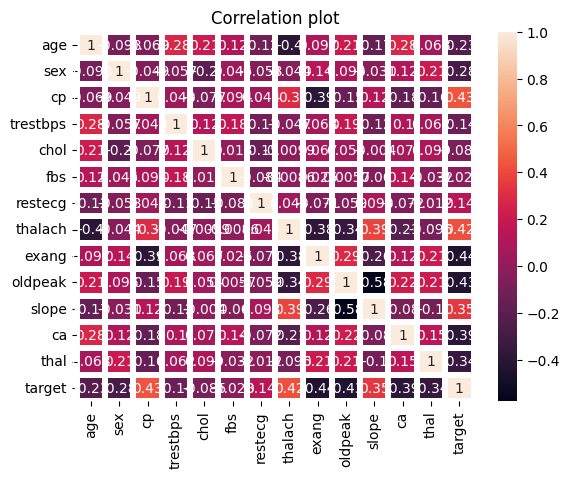

In [21]:
corr_plot=sns.heatmap(heart_data.corr(),annot=True,linewidths=3)
plt.title("Correlation plot")
plt.show()